# 0-1 Knapsack problem statement and other Knapsack-problem varations discussed:
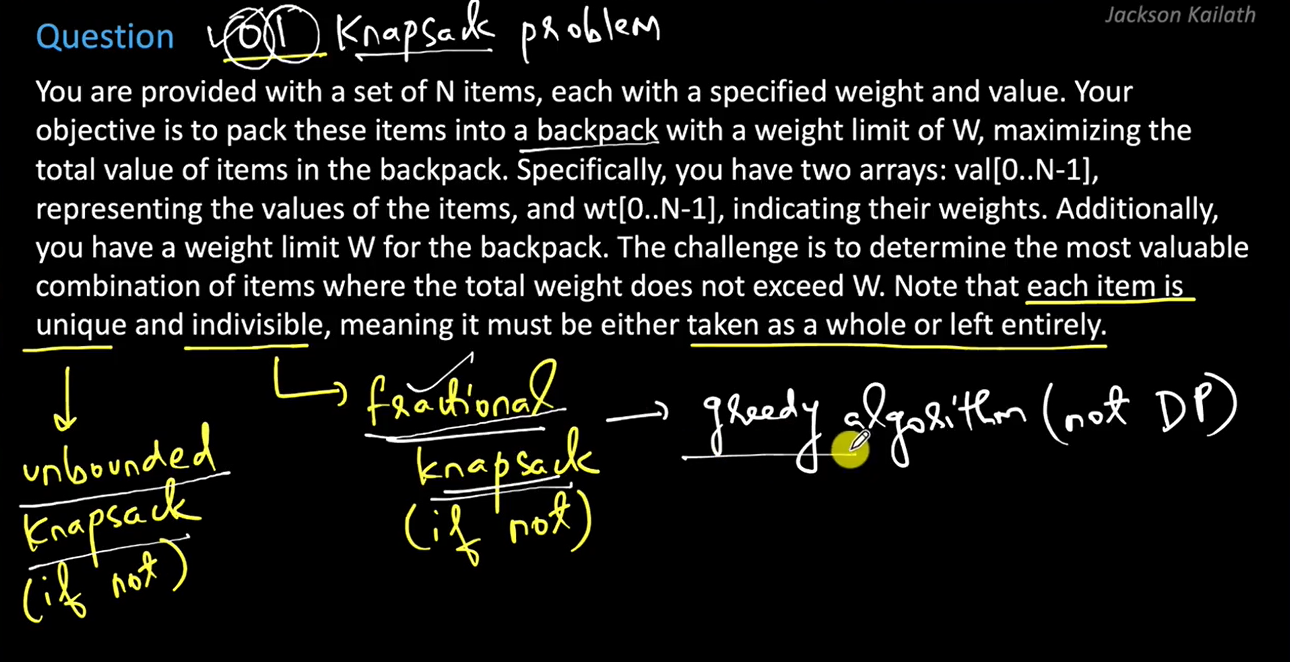
# 0-1 Knapsack problem (clarifying questions to be asked to interviewer):
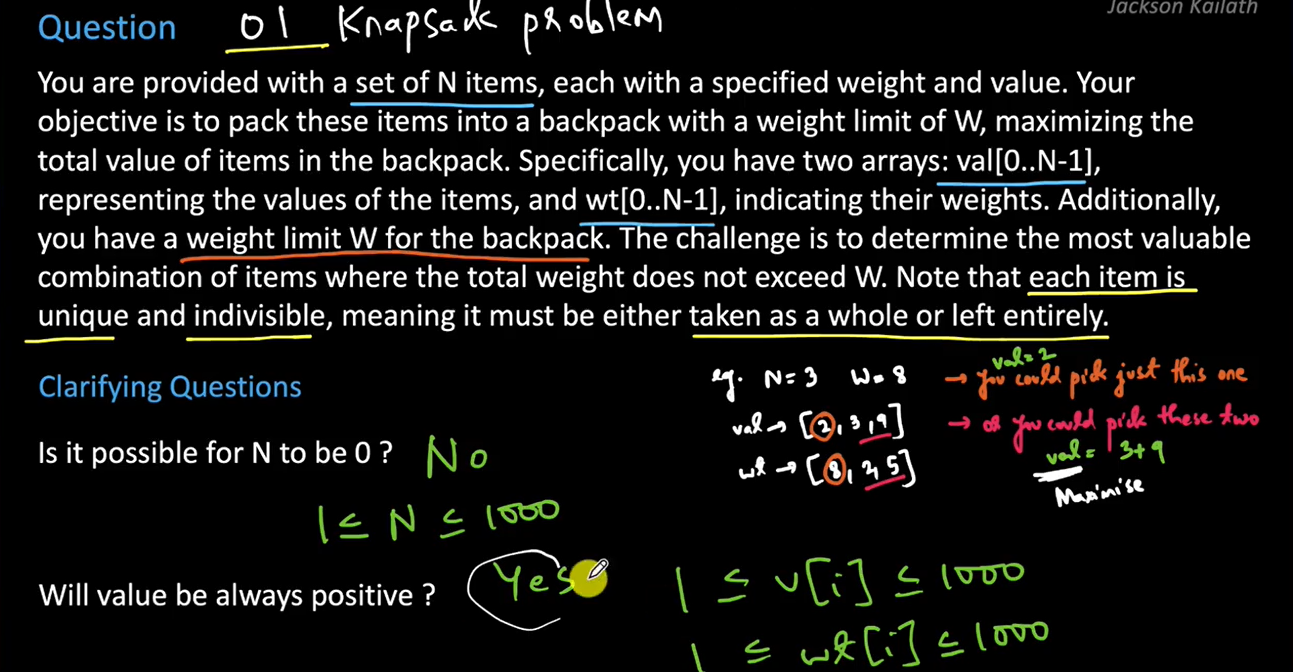
# 0-1 Knapsack problem (test-cases):
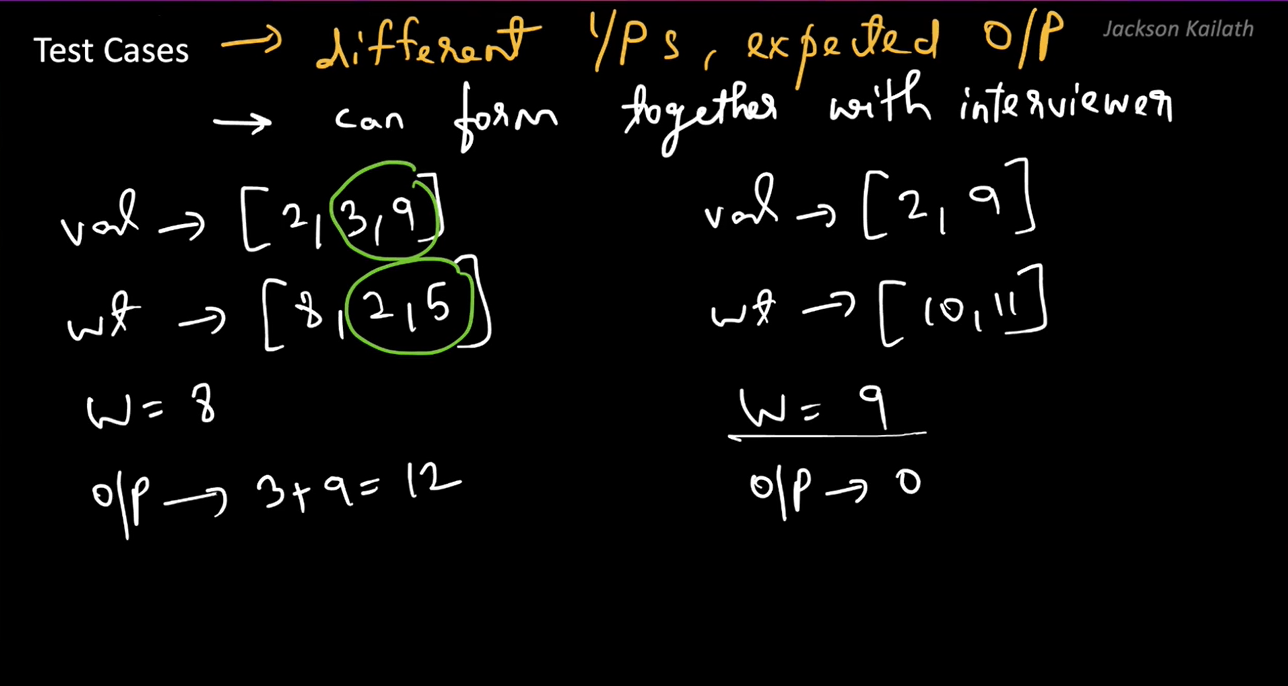

# 0-1 Knapsack problem (coding-exercise q):
- Coding Exercise: 01 Knapsack
You are provided with a set of N items, each with a specified weight and value. Your objective is to pack these items into a backpack 
with a weight limit of W, maximizing the total value of items in the backpack. Specifically, you have two arrays: val[0..N-1], representing the values of the items, and wt[0..N-1], indicating their weights. 
Additionally, you have a weight limit W for the backpack. The challenge is to determine the most valuable combination of items where the total weight does not exceed W. Note that each item is unique and indivisible, meaning it must be either taken as a whole or left entirely.



- Input:

N = 3

W = 8

values[] = [2,3,9]

weight[] = [8,2,5]


- Output: 12

Explanation: Choose the last 2 items that weighs 2 and 5 units respectively and hold values 3 and 9 that add up to 12. 


# 0-1 Knapsack problem (Approaches):
### here as you can identify from dynamic programming we can solve this porblem because this 0-1 knapsack problem has optimal-substructure feature (where we have to find out maximum value we can attain by putting the unique items with weight) and here one more feature is 'choice' , choice of 'not choosing' and 'choosing' the item here to put into the bascket (knapsack)
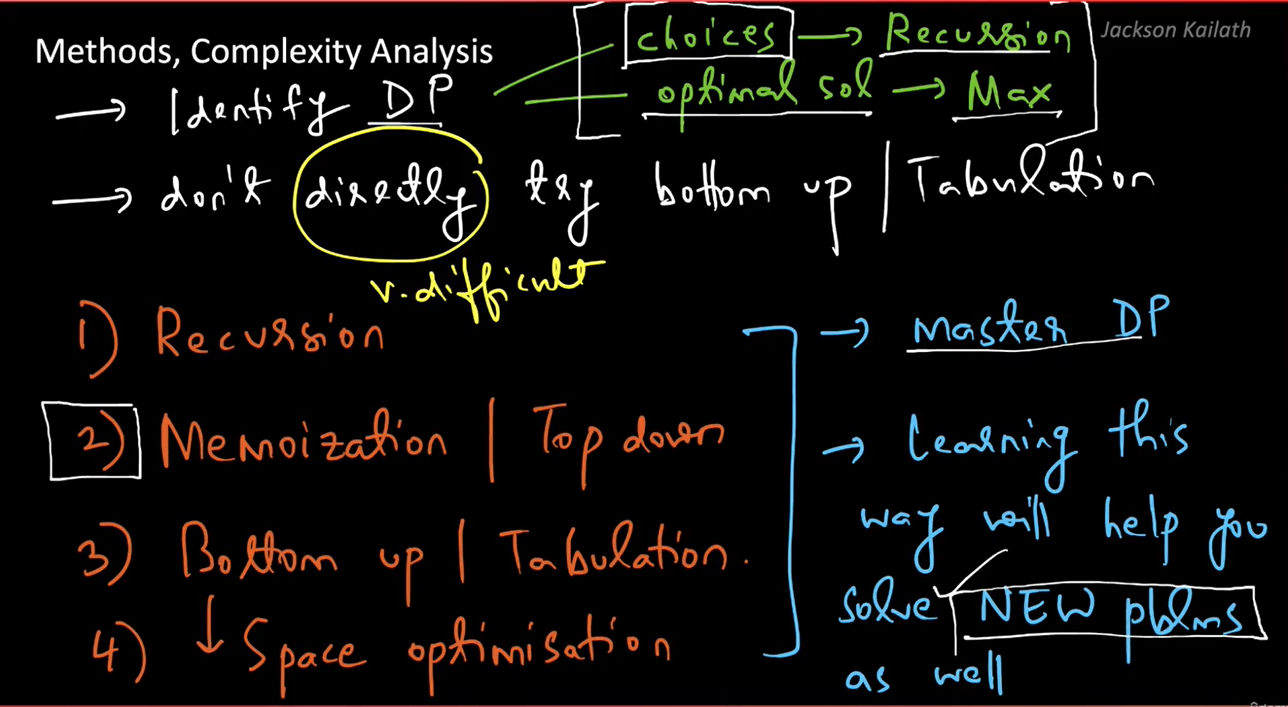
# 0-1 Knapsack problem (Recursion-approach):
### as in this problem we have only two choices (after checking weight of item less than knapsack-capacity --YES) : either include the item or exclude the item ; (if weight of item less than knapsack-capacity -- NO) : simply exclude it as anyhow it will not fit in knapsack with this much weight  
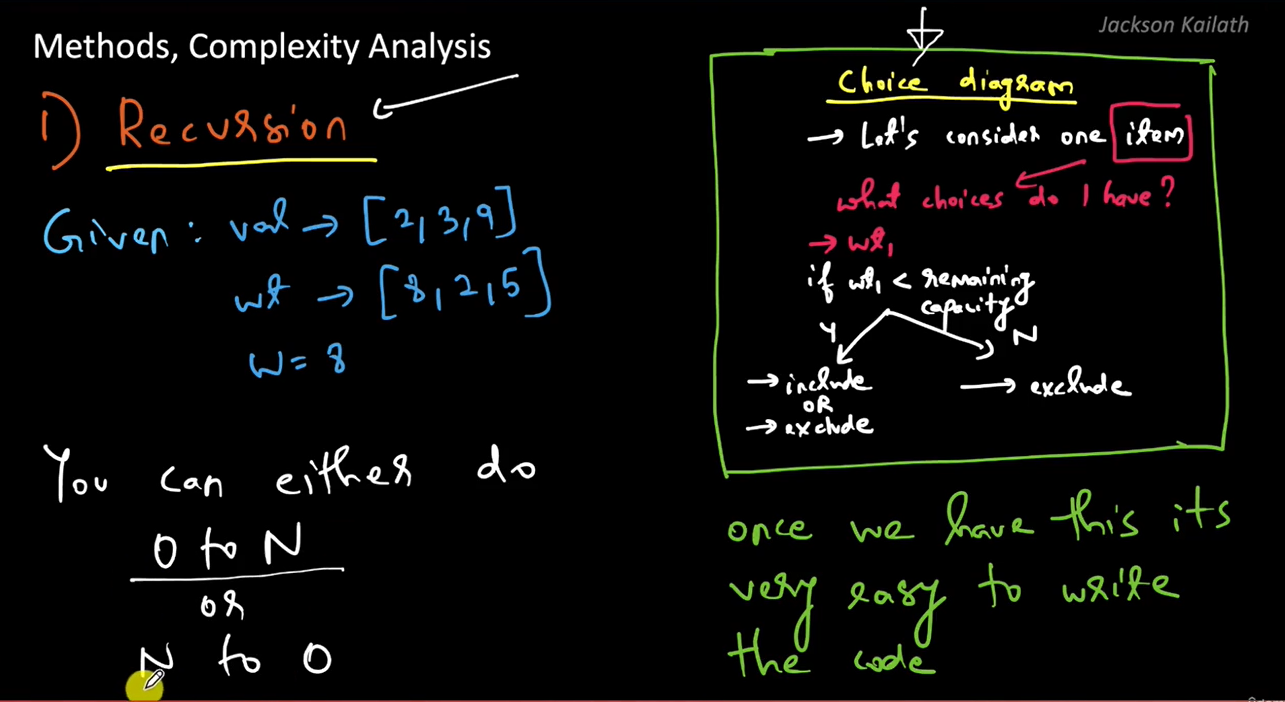
### as after including and excluding the each succesive element ot the knapsack , we have encountered to the further sub-problem of 0-1 knapsack with updated knapsack capacity (decreased capacity if element included , else remained same if element excluded) and two arrays of reamining items' weight & values respectively. 
### As here we can see in the recursion tree : [we're going to considered branch which gives us maximum-value among two branches of exclusion and inclusion of the item]:-
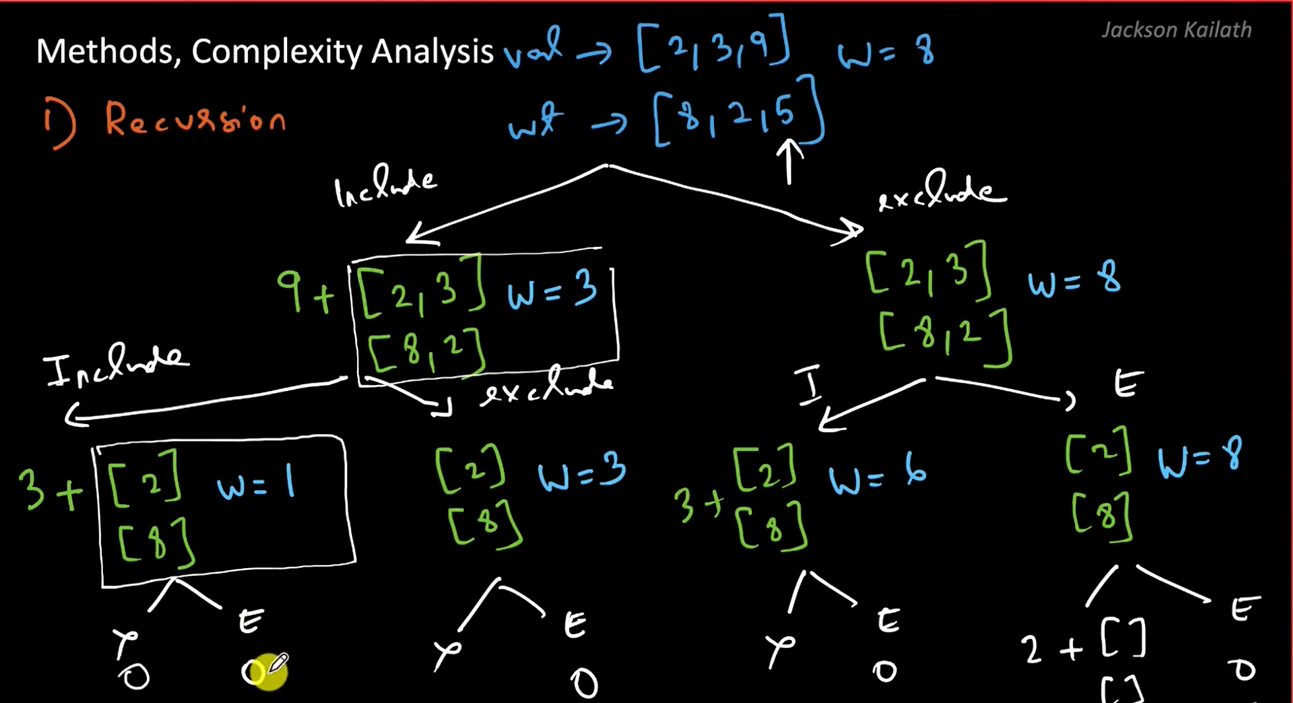
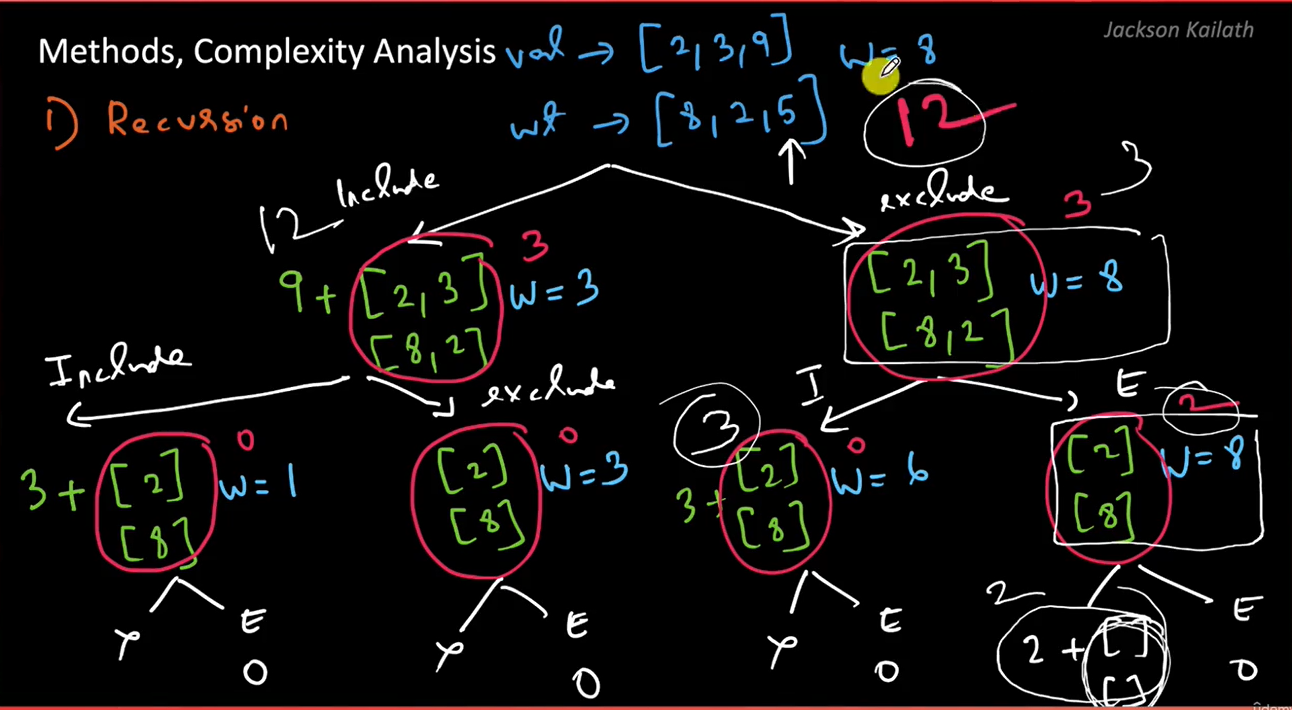
# 0-1 Knapsack problem (psuedo-code):
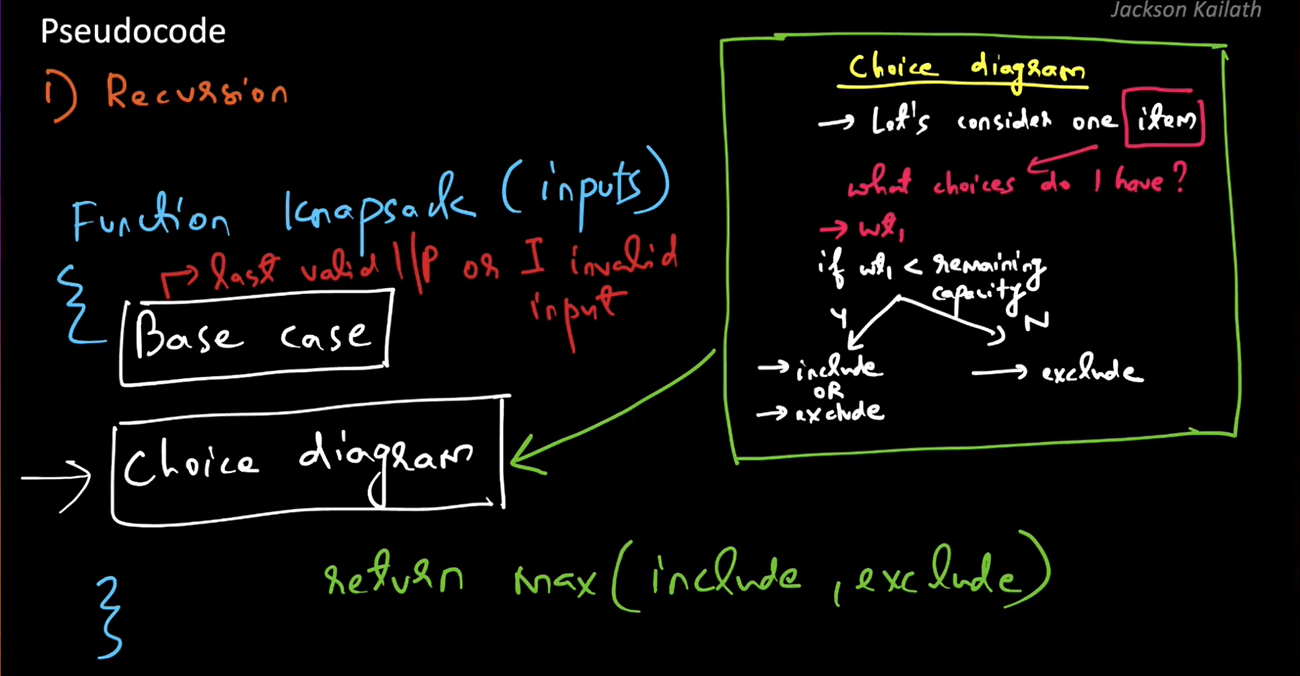
# 0-1 Knapsack problem (complexity):
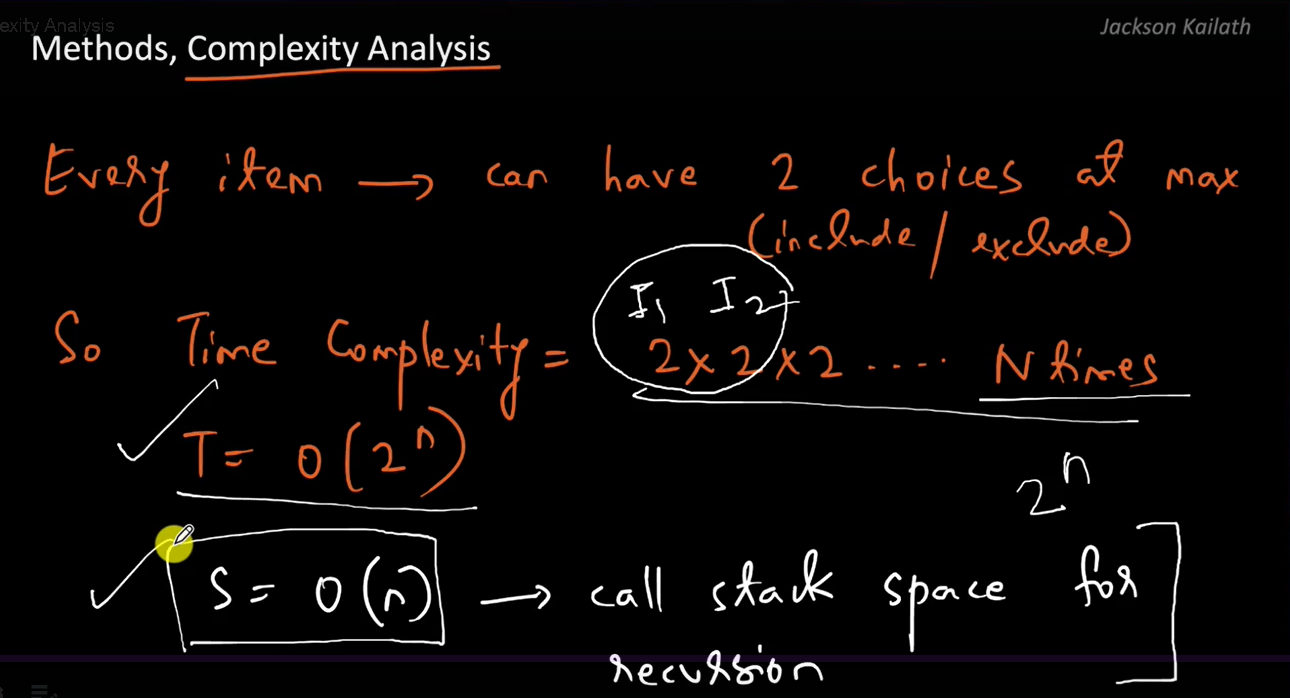
# 0-1 Knapsack problem (code-implementation):
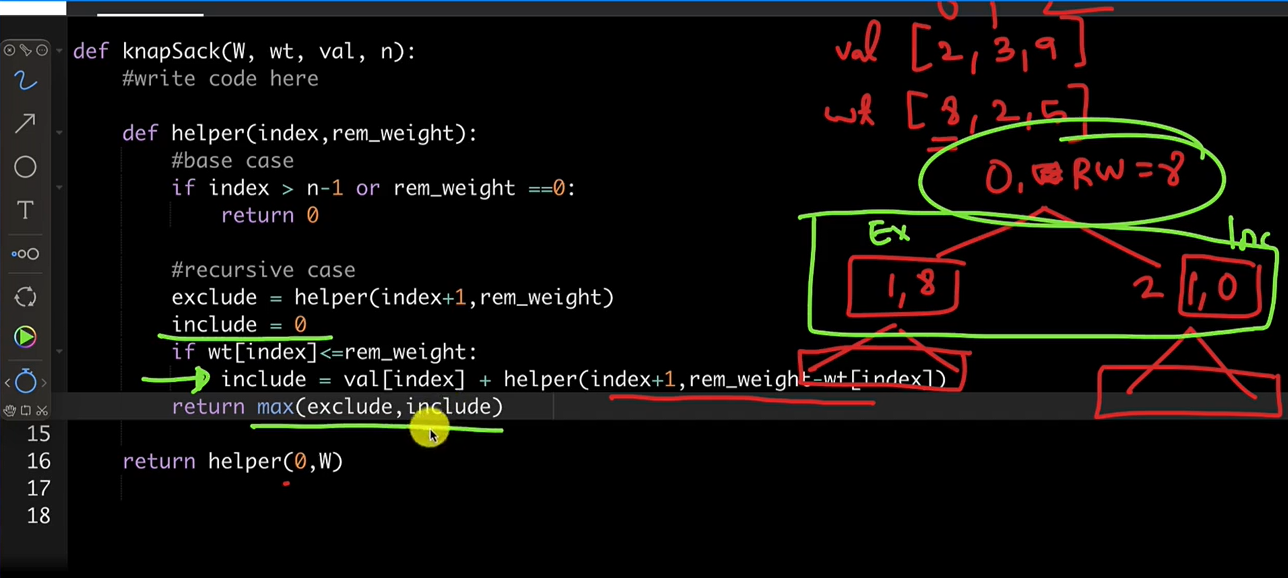


In [3]:
# recursive approach code implementation for solving the 0-1 Knapsack problem:

def knapsack_01(W, wt, val, n): 
      #here W is total Weight-capacity of knapsack and wt is array-weight of items ; val is array-values of items , 'n' is number of items
      def recursive_knapsack(index, rem_wt):  
          # here index is current element we're looking up to whereas 'rem_wt' is reamaining-weight that kanapsack can have 
        #base-cases //when index goes beyond last element or rem_wt equals to zero 
        if (index > (n-1)) or rem_wt == 0 : return 0 # then we return value zero as nothing to add further in the knapsack
        
        #exclude-branch : while excluding the element at current index ; means we move further to the next index(without adding the value of current index) and rem_wt will reamined same 
        exclude = recursive_knapsack(index+1, rem_wt)
        
        #include-branch : while including the element at current index; means value at current index will be added and rem_wt will be reduced by wt of element at this index.
        # don't forgot to intialise 'include' vairable with zero ; 
        # as there might be possible cases where weight of element is greater than rem_wt [as the result if condition will not be true and scope of include-var will be lost]; element will not be included.
        # meaning include branch will exclude that element and adds zero value ; so for comparison purpose its important to initialize include-var
        include = 0  # initialisation
        if wt[index] <= rem_wt:
          include = val[index] + recursive_knapsack(index+1, rem_wt - wt[index] )  
        
        # now we have to return maximum-value among insertion and exclusion branches
        return max(exclude, include) 
      
      return recursive_knapsack(0,W)  # initialized recursive_knapsack fn here with initial starting indez set to zero 
                                     # initialized with rem_wt set to 'W' as initial remaining_weight of knapsack will be equals to total weight capacity of knapsack   
#example usage:
N = 3   # total items   // length of arrays           
W = 8#total capacity of knapsack                           
values = [2,3,9]   # values of items
weight =[8,2,5]  # correspondignly weights of items

print(knapsack_01(W,weight,values,N))  # should be 12  = [3+9] ; which have weights =[2+5]= 7 < W(8)


12


In [5]:
def knapSack(W, wt, val, n):
    #write code here
    def helper(index,rem_weight):
        #base case
        if index > n-1 or rem_weight ==0:
            return 0
    
        #recursive case
        exclude = helper (index+1, rem_weight)
        include = 0
        if wt [index]<=rem_weight:
            include = val [index] + helper(index+1, rem_weight-wt[index])
        return max(exclude, include)
    return helper (0,W)

#example usage:
N = 3   # total items   // length of arrays           
W = 8#total capacity of knapsack                           
values = [2,3,9]   # values of items
weight =[8,2,5]  # correspondignly weights of items

print(knapsack_01(W,weight,values,N))  # should be 12  = [3+9] ; which have weights =[2+5]= 7 < W(8)


12


# 0-1 knapsack problem solving through Memoization(top-down)-approach:
### Here we have to make 2-3 table for memorization of solutions to several opverlapping-subproblems 
### 2-d table where column-arrtibutes have remaining-weight(rem_wt)  whereas the rows-attributes denotes the items 
### [NOTE]: initialised this table's cell with '-1'   
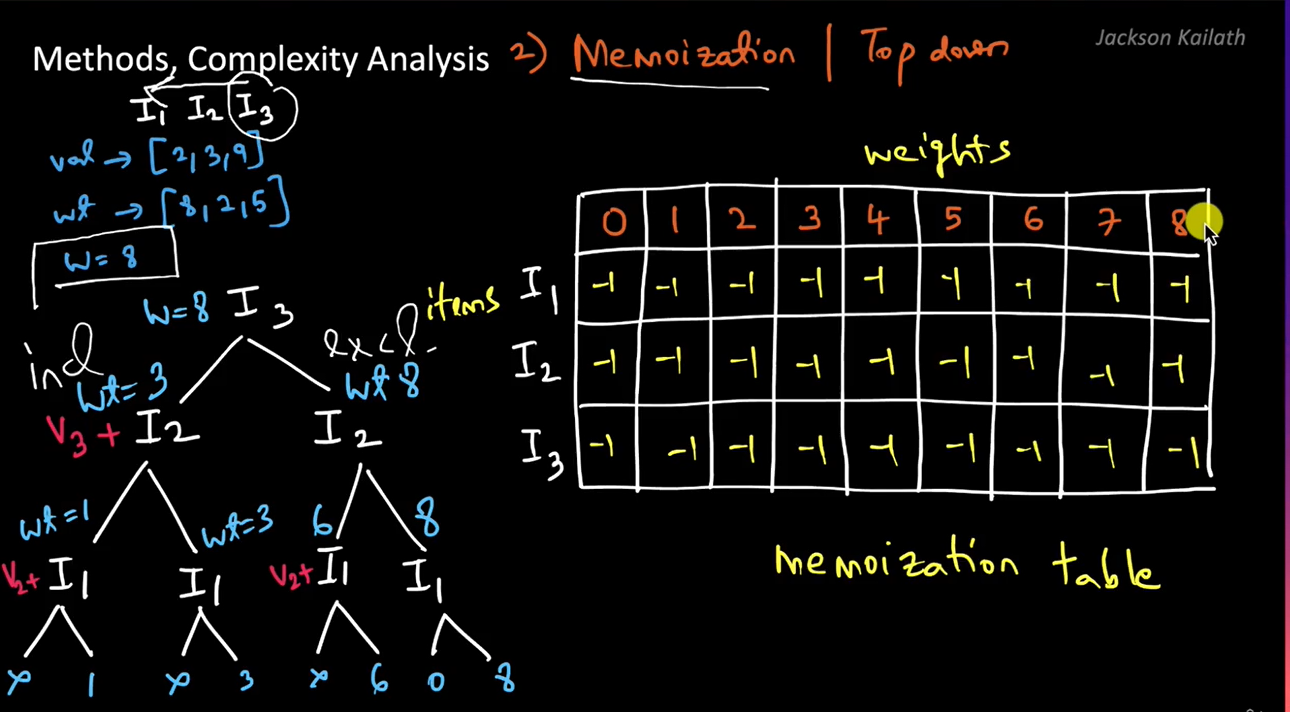
### Here you can see Blue-shedded cell is where we have to fill the solution to the subproblem with rem_wt =  4 ; items(remaining) to be filled [i1,i2], we have to choose maximum value among the exclusion & inclusion branch of i2, and fill the value as solution there in the cell

### similarly for red-shedded cell where subproblem is :
### rem_wt :7 ; items= [ i1,i2,i3] ; solution should be : maximum_value(exclusion(i3), inclusion(i3))
### green-shedded-cell is where major solution to the problem at hand will be filled as its has rem_wt : 8 ; items=[i1,i2,i3]
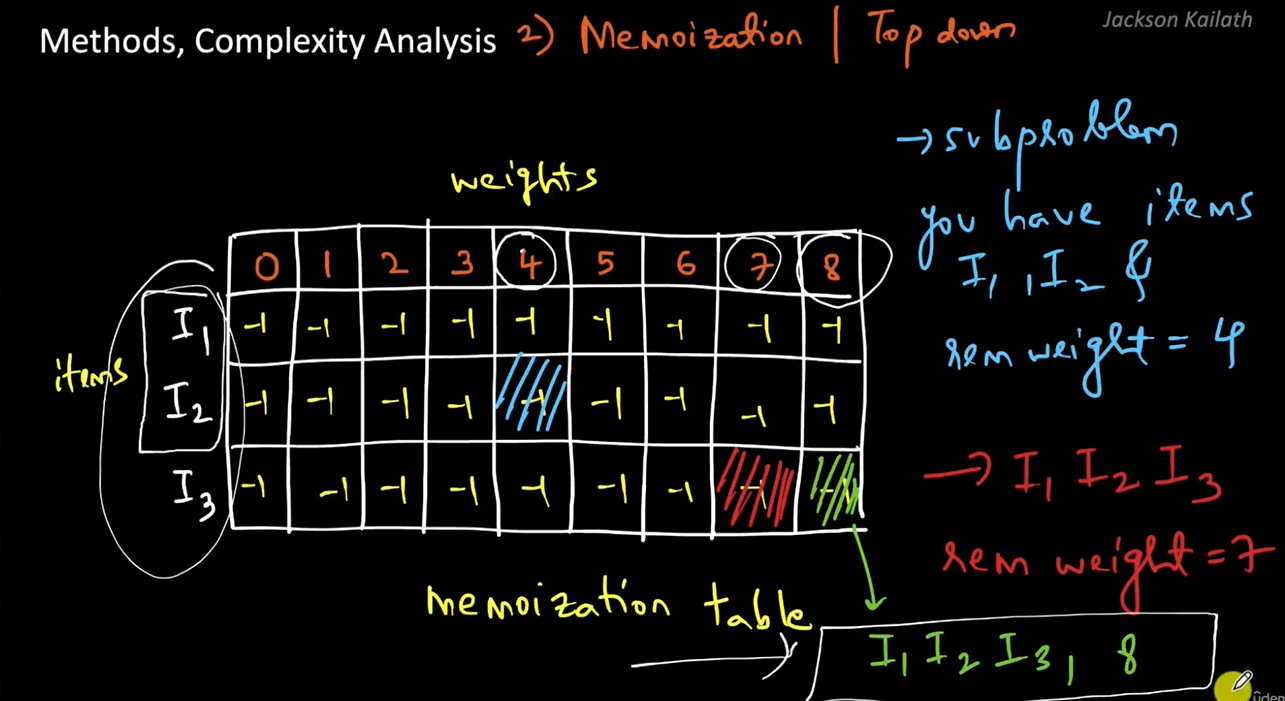

### This is how we're going to fill the solutions to our memoization table :
- 1. here if we start firstly from i3-item :

- 1.1 [In i3 inclusion branch] :- 
- 1.1.1  [in i2 inclusion branch] :- item =[i1] ; rem_wt= 1 ; sol = max_value(inclusion(i1),exclusion(i1)) = max_value(0,0) = 0
- 1.1.2  [in i2 exclusion branch] :- item =[i1] ; rem_wt= 3 ; sol = max_value(inclusion(i1),exclusion(i1)) = max_value(0,0) = 0

- 1.1 [In i3 inclusion branch] :-  item = [i2,i1];  rem_wt= 3 ; sol = max_value(inclusion(i2),exclusion(i2)) = max_value(3,0) = 3

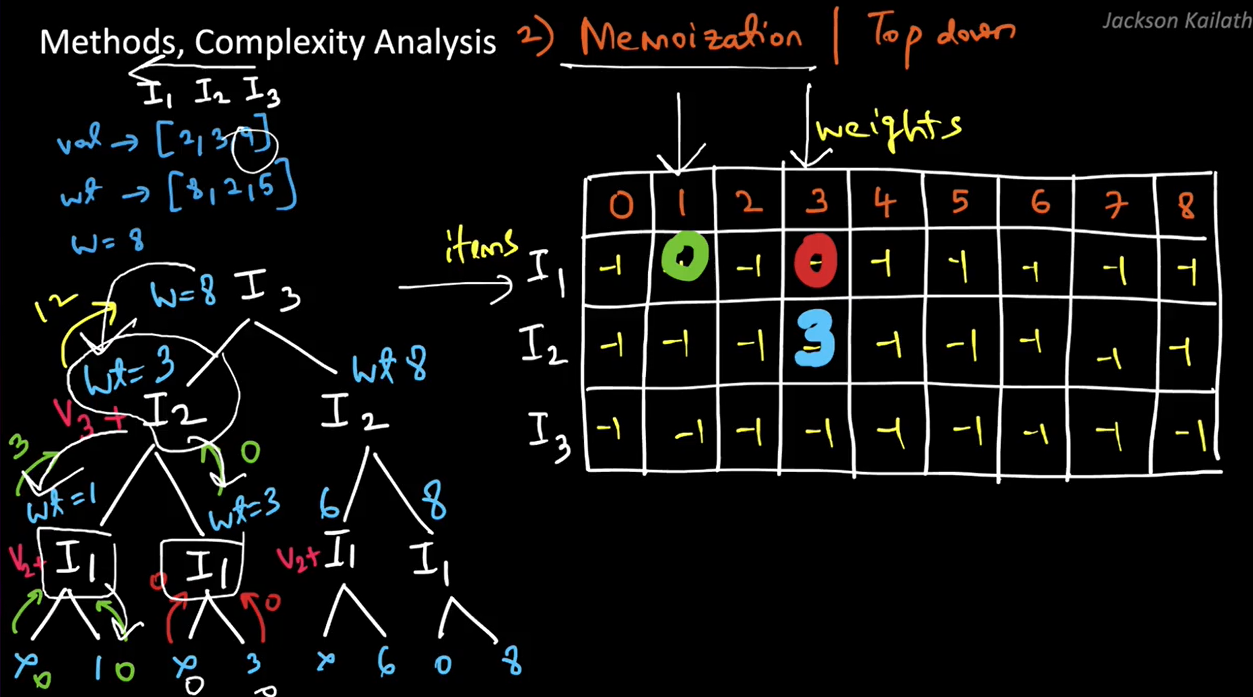

- 1.2 [In i3 exclusion branch] :- 
- 1.2.1  [in i2 inclusion branch] :- item =[i1] ; rem_wt= 6 ; sol = max_value(inclusion(i1),exclusion(i1)) = max_value(0,0) = 0
- 1.2.2  [in i2 exclusion branch] :- item =[i1] ; rem_wt= 8 ; sol = max_value(inclusion(i1),exclusion(i1)) = max_value(2,0) = 2

- 1.2 [In i3 exclusion branch] :-  item = [i2,i1];  rem_wt= 8 ; sol = max_value(inclusion(i2),exclusion(i2)) = max_value(3,2) = 3
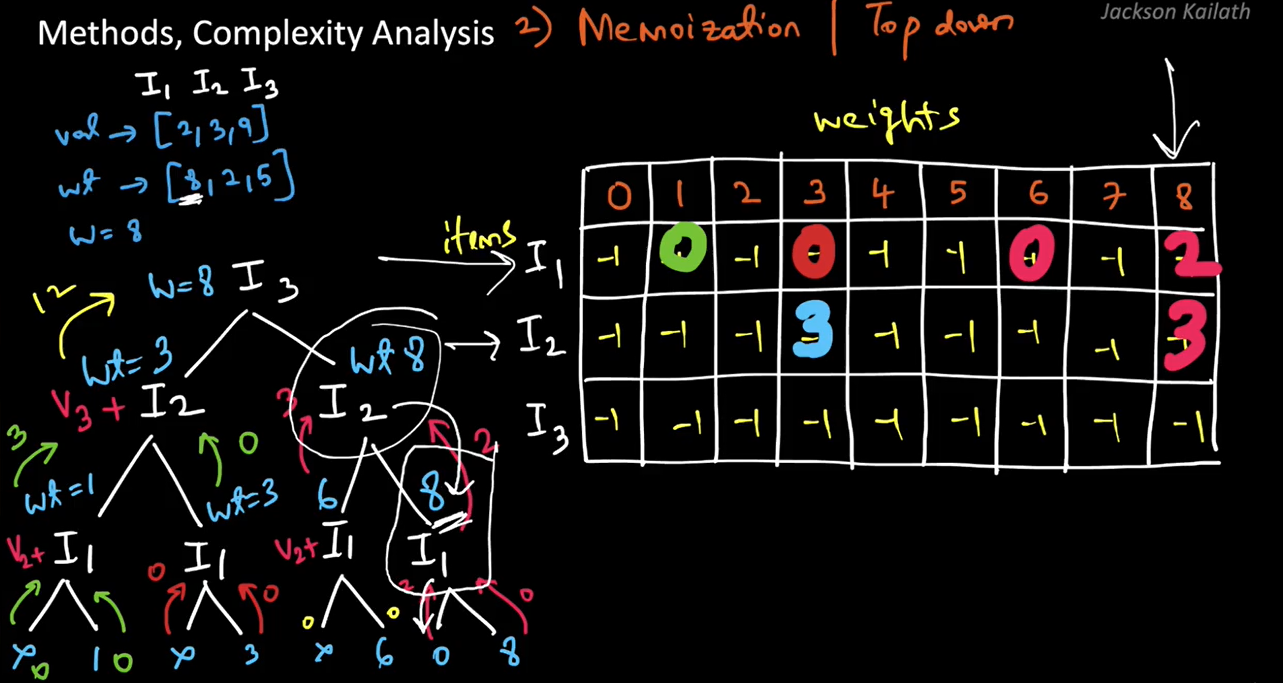
- finally 1. i3:  item = [i3,i2,i1];  rem_wt= 8 ; sol = max_value(inclusion(i3),exclusion(i3)) = max_value(12,3) = 12  [ANS]
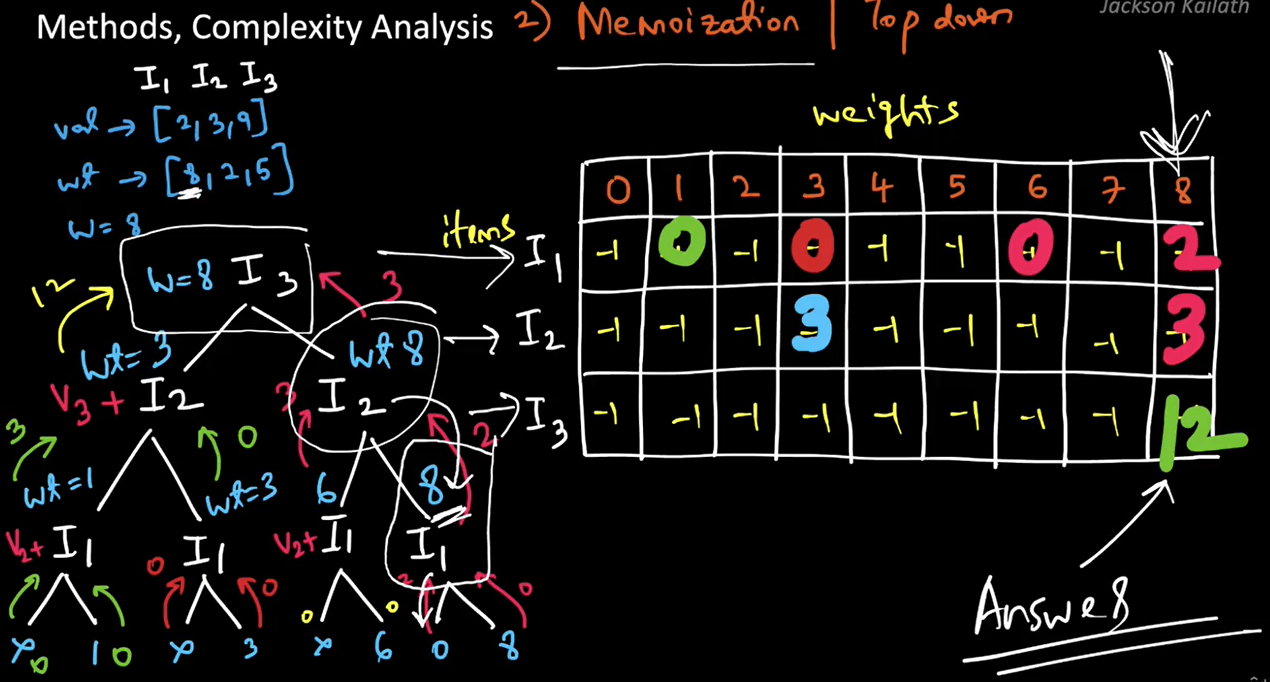

# 0-1 knapsack problem Memoization(top-down)-approach[psuedo-code]:
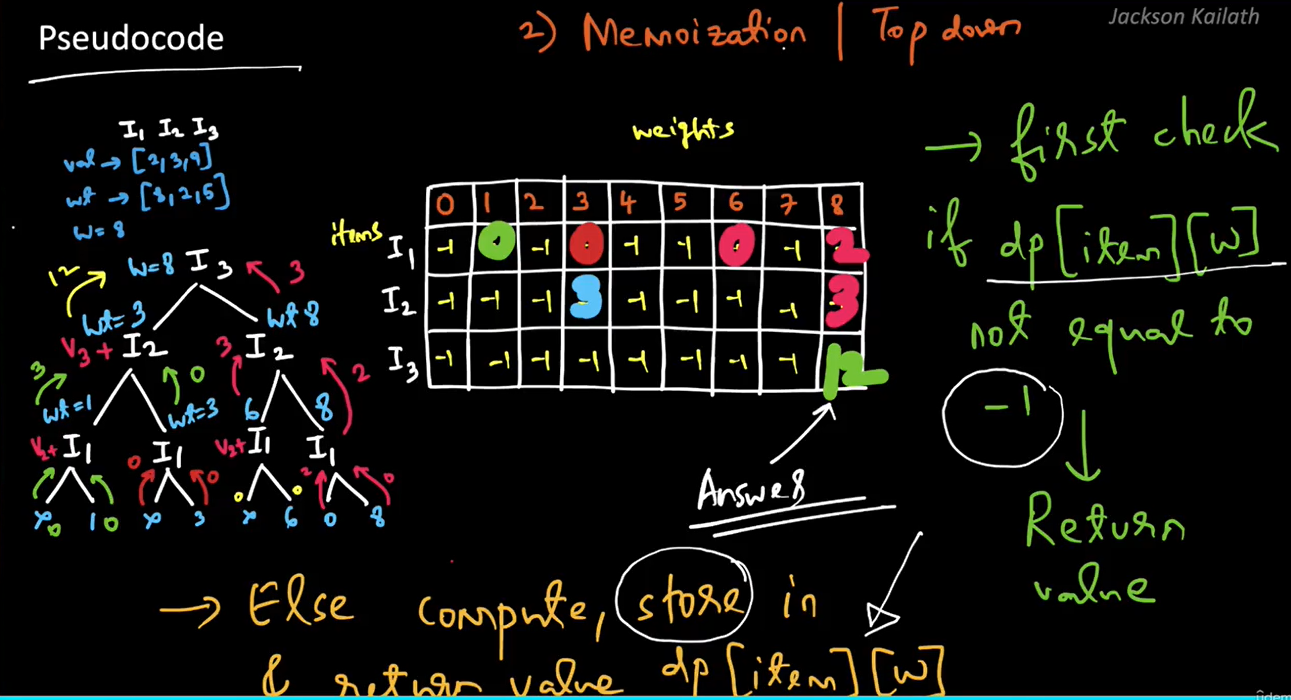

# 0-1 knapsack problem Memoization(top-down)-approach[code-implementation]:
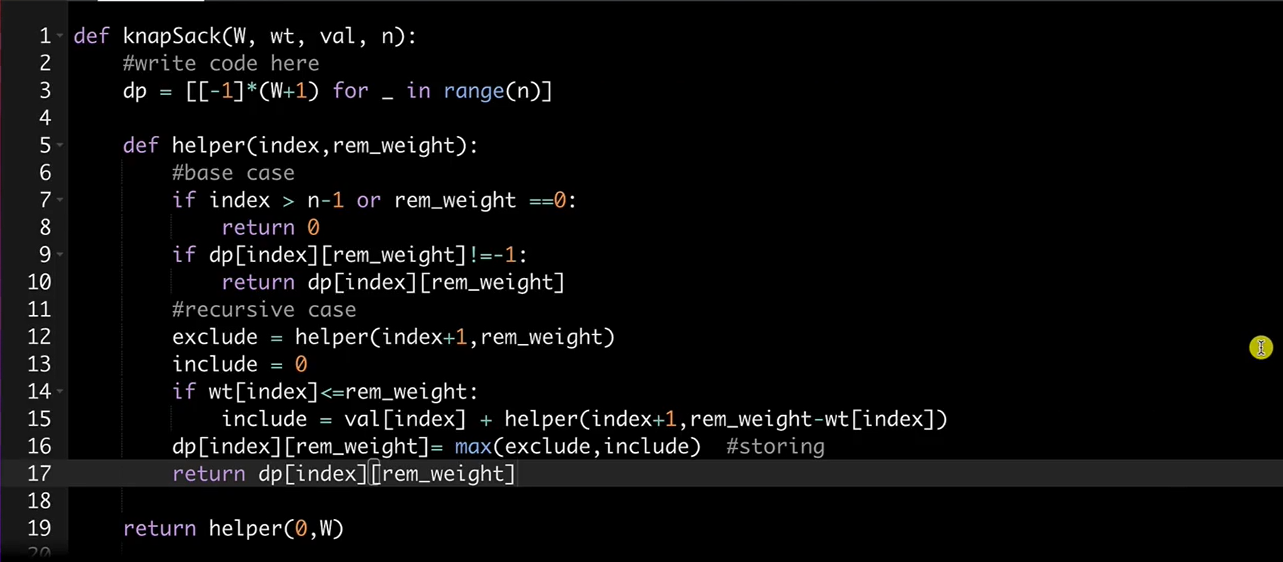

# 0-1 knapsack problem Memoization(top-down)-approach[Complexity]:
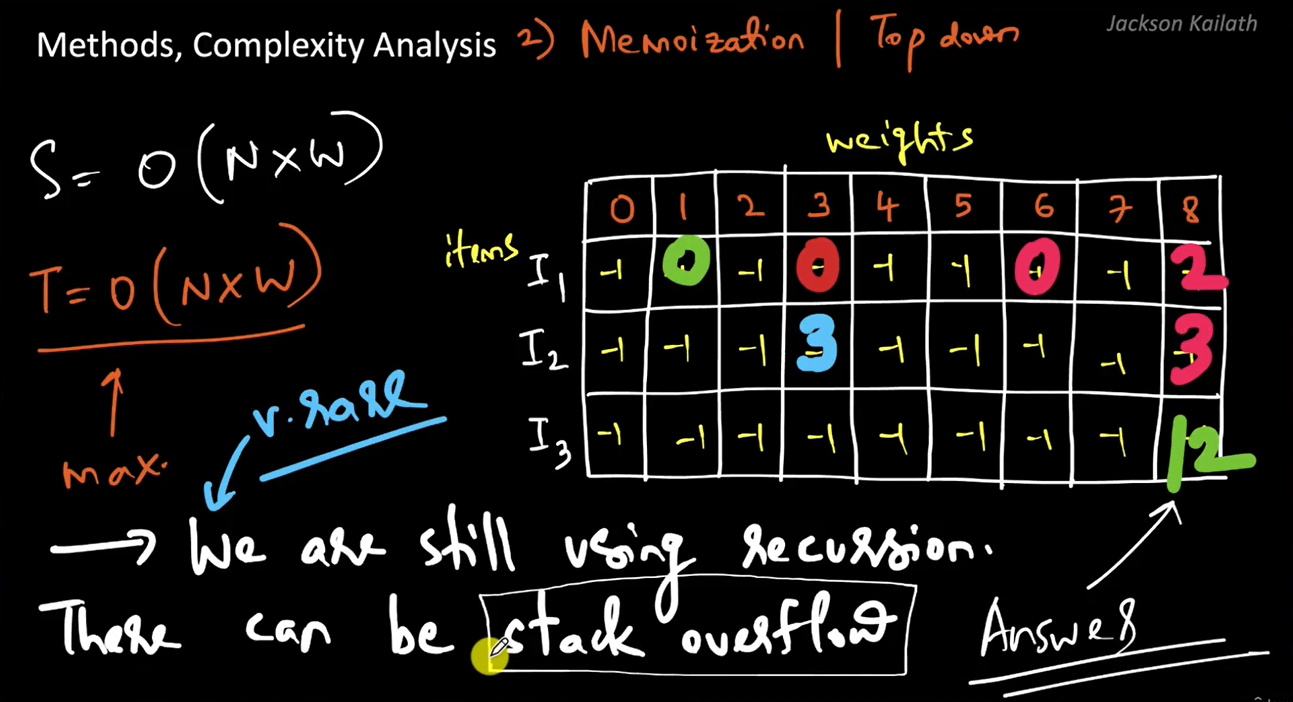

In [16]:
# Memoization(top-down) approach code implementation for solving the 0-1 Knapsack problem:   
# we make little bit changes to alreadu existed recursive approach code : 
# like constructing the 2-d table , and storing the solutions(max_value) of several overlapping sub-problems in the 2-d table ; so that we can use them if already calculated ..no need to calclulate max_value each time.

def knapsack_01(W, wt, val, n): 
      #here W is total Weight-capacity of knapsack and wt is array-weight of items ; val is array-values of items , 'n' is number of items
      def recursive_knapsack(index, rem_wt):  
        #constructing 2-D table ; by initializing with '-1' W+1-times and upto n-rows
        dp = [[-1]*(W+1) for _ in range(n)] 
        
          # here index is current element we're looking up to whereas 'rem_wt' is reamaining-weight that kanapsack can have 
        #base-cases //when index goes beyond last element or rem_wt equals to zero 
        if (index > (n-1)) or rem_wt == 0 : return 0 # then we return value zero as nothing to add further in the knapsack
        
        #now checking if there's sub-prblem for which max_value(solution) already calculated then we just return that solution of subrpblem
        if dp[index][rem_wt] != -1:
          return dp[index][rem_wt]
        #else calculate the solution(max_vlaue) of newly encountered subproblem , with rem_wt and index
         
        #exclude-branch : while excluding the element at current index ; means we move further to the next index(without adding the value of current index) and rem_wt will reamined same 
        exclude = recursive_knapsack(index+1, rem_wt)
        
        #include-branch : while including the element at current index; means value at current index will be added and rem_wt will be reduced by wt of element at this index.
        # don't forgot to intialise 'include' vairable with zero ; 
        # as there might be possible cases where weight of element is greater than rem_wt [as the result if condition will not be true and scope of include-var will be lost]; element will not be included.
        # meaning include branch will exclude that element and adds zero value ; so for comparison purpose its important to initialize include-var
        include = 0  # initialisation
        if wt[index] <= rem_wt:
          include = val[index] + recursive_knapsack(index+1, rem_wt - wt[index] )  
        
        # now we have to store maximum-value(solution) among inclusion and exclusion branches; at the corresponding [index and rem_wt] cell of DP
        dp[index][rem_wt] = max(exclude, include)
        # now simply return majaor solution of problem at hand 
        return dp[index][rem_wt] 
      
      return recursive_knapsack(0,W)  # initialized recursive_knapsack fn here with initial starting indez set to zero 
                                     # initialized with rem_wt set to 'W' as initial remaining_weight of knapsack will be equals to total weight capacity of knapsack   
#example usage:
N = 3   # total items   // length of arrays           
W = 8#total capacity of knapsack                           
values = [2,3,9]   # values of items
weight =[8,2,5]  # correspondignly weights of items

print(knapsack_01(W,weight,values,N))  # should be 12  = [3+9] ; which have weights =[2+5]= 7 < W(8)


12


In [17]:
def knapSack(W, wt, val, n):
    dp = [[-1]* (W+1) for _ in range(n)]
    def helper(index, rem_weight):
        #base case
        if index > n-1 or rem_weight ==0:
            return 0
        if dp[index][rem_weight]!=-1:
            return dp[index][rem_weight]
        #recursive case
        exclude = helper(index+1, rem_weight)
        include = 0
        if wt[index]<=rem_weight:
            include = val[index] + helper(index+1, rem_weight-wt[index])
        dp[index][rem_weight]= max(exclude, include) #storing 
        return dp[index][rem_weight]
    return helper(0,W)

#example usage:
N = 3   # total items   // length of arrays           
W = 8#total capacity of knapsack                           
values = [2,3,9]   # values of items
weight =[8,2,5]  # correspondignly weights of items

print(knapsack_01(W,weight,values,N))  # should be 12  = [3+9] ; which have weights =[2+5]= 7 < W(8)


12
